<h1> Building the Deutsch-Jozsa Algorithm on the Qiskit Framework

In [4]:
from qiskit import __version__
assert __version__ == '2.0.0', f"Qiskit 2.0.0 is required, but found {__version__}."
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

Basic Circuit Diagram for Deustch Josza Algorithm

<div style="text-align: center;">
<img src="Deutsh-Jozsa.png" width='80%'>
</div>

## Building a balanced Oracle

The Oracle circuit:

<div style="text-align: center;">
    <img src="balanced_oracle.png" alt="Balanced Oracle" width="30%">
</div>

In [32]:
def balanced_3_qubit_oracle(qr:QuantumRegister, ancilla:QuantumRegister) -> qiskit.circuit.Gate:

    qc = QuantumCircuit(qr, ancilla)

    qc.cx(qr[0], ancilla)

    gate = qc.to_gate(label='Balanced Oracle')
    gate.name = 'Balanced Oracle'

    return gate

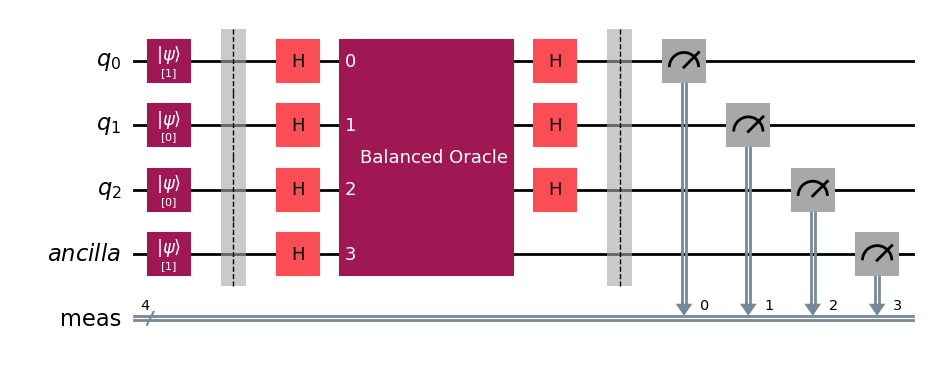

In [55]:
def balanced_3_qb_dj_alg(init_states:list) -> QuantumCircuit:

    qr = QuantumRegister(3, 'q')
    ancilla = QuantumRegister(1, 'ancilla')
    
    qc = QuantumCircuit(qr, ancilla)

    # initialize the qubit states
    qc.initialize(init_states[0], qr[0])
    qc.initialize(init_states[1], qr[1])
    qc.initialize(init_states[2], qr[2])
    qc.initialize(init_states[3], ancilla[0])

    qc.barrier()

    # Apply Hadamard gates to all qubits
    qc.h(qr)
    qc.h(ancilla)

    # Apply the balanced oracle
    oracle = balanced_3_qubit_oracle(qr, ancilla)
    qc.append(oracle, range(4))

    # Apply Hadamard gates to all qubits again
    qc.h(qr)

    qc.measure_all(qr, ClassicalRegister(3, 'c'))

    return qc

init = [1, 0, 0, 1]
qc = balanced_3_qb_dj_alg(init_states=init)
qc.draw('mpl')

### Simulation

In [50]:
from qiskit_aer import AerSimulator
from qiskit import transpile

In [64]:
lables = []
results = []
counts = []

sim = AerSimulator(method='statevector')

for i in range(2**4):
    print(f"Initial state: {i:04b}")
    # print([int(x) for x in f"{i:04b}"])
    lables.append(f"{i:04b}")
    qc = transpile( balanced_3_qb_dj_alg(init_states=[int(x) for x in f"{i:04b}"]), sim, optimization_level=0)

    job = sim.run(qc, shots=1024)
    results.append(job.result())
    counts.append(job.result().get_counts(qc))

Initial state: 0000
Initial state: 0001
Initial state: 0010
Initial state: 0011
Initial state: 0100
Initial state: 0101
Initial state: 0110
Initial state: 0111
Initial state: 1000
Initial state: 1001
Initial state: 1010
Initial state: 1011
Initial state: 1100
Initial state: 1101
Initial state: 1110
Initial state: 1111


 x_0 = 0
 x_1 = 0
 x_2 = 0
 y = 1


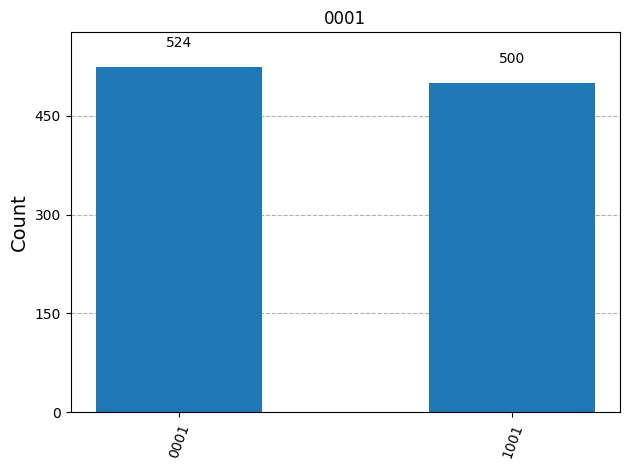

In [ ]:
i = 1
print(f" x_0 = {lables[i][0]}\n x_1 = {lables[i][1]}\n x_2 = {lables[i][2]}\n y = {lables[i][3]}")
plot_histogram(counts[i], title=lables[i])

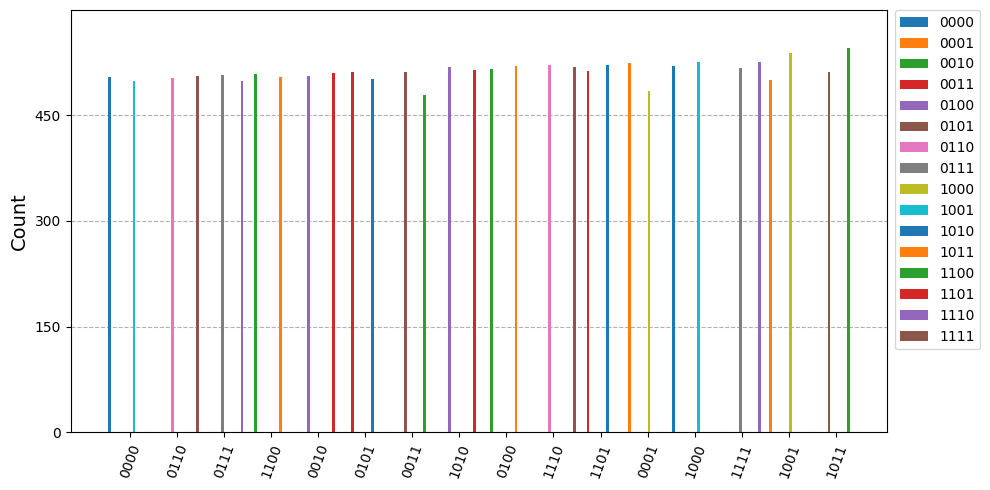

In [81]:
plot_histogram(counts, legend=lables, sort='value', figsize=(10, 5), bar_labels=False)